### Load and merge datasets 
Need some fields from tmdb_5000_movies.csv and all_movie.csv merged into
OMdb_mojo_clean.csv. OMdb_mojo_clean.csv is the master dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from functools import partial
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import statsmodels.api as sm
import matplotlib.pyplot as plt
from dython import nominal


In [2]:
OMdb = pd.read_csv('data/OMdb_mojo_clean.csv', na_values = ['NaN', 'inf'])

In [3]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv', na_values = ['NaN', 'inf'])

In [4]:
all_movie = pd.read_csv('data/all_movie.csv', na_values = ['NaN', 'inf'])

From all_movie.csv, merge Writer1 through Writer4 into OMdb_mojo_clean.csv
for matching movies by “Title” in all_movie.csv

In [5]:
movie_writers = all_movie.loc[:, (all_movie.columns.str.startswith('Write')) | (all_movie.columns == 'Title')]

In [6]:
OMdb = OMdb.merge(movie_writers, how = 'left', left_on = 'Title', right_on = 'Title')

In [7]:
OMdb.shape

(1288, 53)

From tmdb_5000_movies.csv merge “budget” field into OMdb_mojo_clean.csv by
matching movie “title”

In [8]:
tmdb_new = tmdb[['title', 'budget']]

In [9]:
OMdb = OMdb.merge(tmdb_new, how = 'left', left_on = 'Title', right_on = 'title')

In [10]:
OMdb.drop(columns = ['title'], inplace = True)

From Cast1 to Cast 6 all_movie.csv merge into OMdb_mojo_clean.csv by
matching “Title”

In [11]:
movie_casts = all_movie.loc[:, (all_movie.columns.str.startswith('Cast')) | (all_movie.columns == 'Title')]

In [12]:
OMdb = OMdb.merge(movie_casts, how = 'left', left_on = 'Title', right_on = 'Title')

In [13]:
OMdb.shape

(3564, 60)

In [14]:
OMdb = OMdb.drop_duplicates(keep ='first')

In [15]:
OMdb[OMdb['Title'] == 'The Jungle Book']

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,IMdb_ID,IMdb_score,Language,...,Writer 2,Writer 3,Writer 4,budget,Cast 1,Cast 2,Cast 3,Cast 4,Cast 5,Cast 6
1,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Won 1 Oscar. Another 31 wins & 54 nominations.,363995937.0,"UK, USA",30 Aug 2016,Jon Favreau,"Adventure, Drama, Family, Fantasy",tt3040964,74.0,English,...,Writer Not Available,Writer Not Available,Writer Not Available,175000000.0,Neel Sethi,Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba,Lupita Nyong'o
2,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Won 1 Oscar. Another 31 wins & 54 nominations.,363995937.0,"UK, USA",30 Aug 2016,Jon Favreau,"Adventure, Drama, Family, Fantasy",tt3040964,74.0,English,...,Writer Not Available,Writer Not Available,Writer Not Available,175000000.0,Bruce Reitherman,Louis Prima,Sterling Holloway,J. Pat O'Malley,Darleen Carr,Phil Harris
5,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Won 1 Oscar. Another 31 wins & 54 nominations.,363995937.0,"UK, USA",30 Aug 2016,Jon Favreau,"Adventure, Drama, Family, Fantasy",tt3040964,74.0,English,...,Ken Anderson,Vance Gerry,Ralph Wright,175000000.0,Neel Sethi,Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba,Lupita Nyong'o
6,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Won 1 Oscar. Another 31 wins & 54 nominations.,363995937.0,"UK, USA",30 Aug 2016,Jon Favreau,"Adventure, Drama, Family, Fantasy",tt3040964,74.0,English,...,Ken Anderson,Vance Gerry,Ralph Wright,175000000.0,Bruce Reitherman,Louis Prima,Sterling Holloway,J. Pat O'Malley,Darleen Carr,Phil Harris


### Data Preprocessing 

 In OMdb_mojo.clean.csv, clean up the “nan” and “inf” and set them to 0

In [16]:
OMdb._get_numeric_data().isnull().sum().sort_values(ascending = False).head(10)

budget            195
logBoxOffice      191
BoxOffice         191
overseas-gross     19
bo_year_rank       15
domestic-gross      1
overseas-pct        0
domestic-pct        0
IMdb_score          0
Metascore           0
dtype: int64

In [17]:
OMdb.loc[OMdb['BoxOffice'].isnull(), 'BoxOffice'] = 0

In [18]:
OMdb.loc[OMdb['logBoxOffice'].isnull(), 'logBoxOffice'] = 0

In [19]:
OMdb.loc[OMdb['budget'].isnull(), 'budget'] = 0

In [20]:
OMdb.loc[OMdb['overseas-gross'].isnull(), 'overseas-gross'] = 0

In [21]:
OMdb.loc[OMdb['bo_year_rank'].isnull(), 'bo_year_rank'] = 0

In [22]:
OMdb.loc[OMdb['domestic-gross'].isnull(), 'domestic-gross'] = 0

In [23]:
OMdb._get_numeric_data().isnull().sum().sort_values(ascending = False).head(10)

budget          0
years           0
IMdb_score      0
Metascore       0
RT_score        0
Runtime         0
Year            0
awards          0
bo_year         0
bo_year_rank    0
dtype: int64

In [24]:
OMdb = OMdb.fillna('0')

In [25]:
OMdb.isnull().sum()

Actors             0
Awards             0
BoxOffice          0
Country            0
DVD                0
Director           0
Genre              0
IMdb_ID            0
IMdb_score         0
Language           0
Metascore          0
Plot               0
Production         0
RT_score           0
Rated              0
Released           0
Runtime            0
TMdb_id            0
Title              0
Type               0
Website            0
Year               0
actor_1            0
actor_2            0
awards             0
bo_year            0
bo_year_rank       0
director_1         0
director_2         0
domestic-gross     0
domestic-pct       0
imdbVotes          0
itunes_id          0
logBoxOffice       0
mojo_title         0
nominations        0
num_actor          0
num_director       0
num_genre          0
num_lang           0
oscar_noms         0
oscar_wins         0
overseas-gross     0
overseas-pct       0
search_strs        0
studio             0
titles             0
worldwide-gro

Drop all records in OMdb_mojo_clean.csv that have budget = 0 or empty OR if
revenue = 0 or empty

In [26]:
OMdb = OMdb[(OMdb[['budget', 'worldwide-gross']] != 0).all(axis =1)]

In [27]:
OMdb.shape

(408, 60)

In [28]:
OMdb.to_csv('data/OMdb_merged.csv', index = False)

Perform hot encoding for all the non-numeric data columns in OMdb_mojo_clean.csv,
need to have the data ready to be fed to sci-kit library calls for logistic regression, KNN, SVM etc.

In [29]:
cat_cols = np.array(pd.DataFrame(OMdb.dtypes[OMdb.dtypes == 'object']).index)

In [30]:
ohe = OneHotEncoder(drop = 'first')

In [31]:
ohe_array = ohe.fit_transform(OMdb[cat_cols]).toarray()

In [32]:
ohe_OMdb = pd.DataFrame(ohe_array, index = OMdb.index, columns = ohe.get_feature_names())

In [33]:
ohe_OMdb.head()

,"x0_Aaron Paul, Dominic Cooper, Imogen Poots, Kid Cudi","x0_Aaron Taylor-Johnson, Chloë Grace Moretz, Morris Chestnut, Claudia Lee","x0_Adam Sandler, Kevin James, Michelle Monaghan, Peter Dinklage","x0_Adewale Akinnuoye-Agbaje, Christopher Eccleston, Grégory Fitoussi, Joseph Gordon-Levitt","x0_Adrien Brody, Topher Grace, Alice Braga, Walton Goggins","x0_Alan Howard, Noel Appleby, Sean Astin, Sala Baker","x0_Alberto Reyes, Julio Oscar Mechoso, Gustavo Sánchez Parra, Adrian Alonso","x0_Alexander Skarsgård, Rory J. Saper, Christian Stevens, Christoph Waltz","x0_Andrew Garfield, Emma Stone, Jamie Foxx, Dane DeHaan","x0_Andrew Garfield, Emma Stone, Rhys Ifans, Denis Leary",...,x33_Ving Rhames,x33_Wagner Moura,x33_Walter Brennan,x33_Wang Xueqin,x33_Warwick Davis,x33_William H. Macy,x33_William Kircher,x33_William Lee Scott,x33_William Sadler,x33_Ziyi Zhang
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
OMdb_drop_col = OMdb.drop(columns = cat_cols)

In [35]:
OMdb_ohed = pd.concat([OMdb_drop_col, ohe_OMdb], axis = 1)

In [36]:
OMdb_ohed.head()

,BoxOffice,IMdb_score,Metascore,RT_score,Runtime,Year,awards,bo_year,bo_year_rank,domestic-gross,...,x33_Ving Rhames,x33_Wagner Moura,x33_Walter Brennan,x33_Wang Xueqin,x33_Warwick Davis,x33_William H. Macy,x33_William Kircher,x33_William Lee Scott,x33_William Sadler,x33_Ziyi Zhang
1,363995937.0,74.0,77.0000,95.0000,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,363995937.0,74.0,77.0000,95.0000,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,363995937.0,74.0,77.0000,95.0000,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,363995937.0,74.0,77.0000,95.0000,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,87.0,101.3592,101.3592,62.0,2010,0.0,2009.0,18.0,137900000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
OMdb_ohed.to_csv('data/OMdb_ohed.csv', index = False)

 Need correlation matrix for at least these features:
 
    Awards Director Genre IMdb_score Production Rated Writer 4 Writer 3
    Runtime actor_1
    actor_2 worldwide-gross studios oscar_noms oscar_wins writer2
    overseas-gross awards director_1 director_2 imdb_votes nomination writer1 language

In [37]:
OMdb.columns

Index(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director', 'Genre',
       'IMdb_ID', 'IMdb_score', 'Language', 'Metascore', 'Plot', 'Production',
       'RT_score', 'Rated', 'Released', 'Runtime', 'TMdb_id', 'Title', 'Type',
       'Website', 'Year', 'actor_1', 'actor_2', 'awards', 'bo_year',
       'bo_year_rank', 'director_1', 'director_2', 'domestic-gross',
       'domestic-pct', 'imdbVotes', 'itunes_id', 'logBoxOffice', 'mojo_title',
       'nominations', 'num_actor', 'num_director', 'num_genre', 'num_lang',
       'oscar_noms', 'oscar_wins', 'overseas-gross', 'overseas-pct',
       'search_strs', 'studio', 'titles', 'worldwide-gross', 'years',
       'Writer 1', 'Writer 2', 'Writer 3', 'Writer 4', 'budget', 'Cast 1',
       'Cast 2', 'Cast 3', 'Cast 4', 'Cast 5', 'Cast 6'],
      dtype='object')

In [39]:
corr_df = OMdb[['Awards', 'Runtime','IMdb_score', 'worldwide-gross', 'director_2', 'Production', 'studio',
               'imdbVotes','Rated', 'oscar_noms', 'nominations','Writer 4', 'oscar_wins', 'Writer 1',
               'Writer 3', 'Writer 2', 'Language']]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


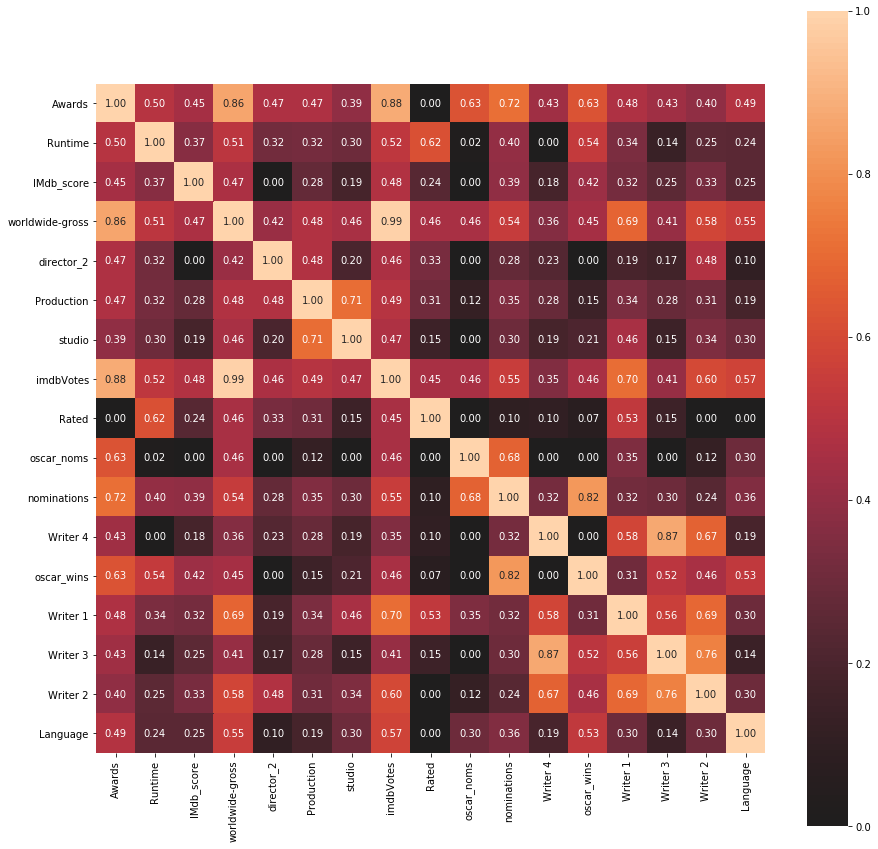

{'corr':                    Awards   Runtime  IMdb_score  worldwide-gross  director_2  \
 Awards           1.000000  0.498322    0.447248         0.861721    0.472546   
 Runtime          0.498322  1.000000    0.374622         0.511502    0.318858   
 IMdb_score       0.447248  0.374622    1.000000         0.467587    0.000000   
 worldwide-gross  0.861721  0.511502    0.467587         1.000000    0.418568   
 director_2       0.472546  0.318858    0.000000         0.418568    1.000000   
 Production       0.468967  0.321055    0.278752         0.479393    0.479399   
 studio           0.392234  0.303633    0.185415         0.457883    0.202660   
 imdbVotes        0.876652  0.521157    0.478174         0.990788    0.464311   
 Rated            0.000000  0.623401    0.237136         0.456937    0.334153   
 oscar_noms       0.628490  0.023250    0.000000         0.457818    0.000000   
 nominations      0.716231  0.401635    0.391207         0.542200    0.278432   
 Writer 4         0.

In [40]:
nominal.associations(corr_df, nominal_columns = 'all', figsize=(15, 15), annot =True)

Covariance matrix to determine which features are similar and can be dropped from model input

In [41]:
OMdb.cov()

,BoxOffice,IMdb_score,Metascore,RT_score,Runtime,Year,awards,bo_year,bo_year_rank,domestic-gross,...,num_director,num_genre,num_lang,oscar_noms,oscar_wins,overseas-gross,overseas-pct,worldwide-gross,years,budget
BoxOffice,1.465699e+16,2.785724e+08,5.318870e+08,8.449870e+08,8.570473e+08,2.076771e+08,1.004855e+09,2.225949e+08,-1.833287e+09,1.118477e+16,...,4.145080e+06,7.131999e+06,5.232280e+06,1.456792e+07,1.124258e+07,1.779285e+16,1.727983e+08,2.897735e+16,2.069310e+08,3.978002e+15
IMdb_score,2.785724e+08,8.901110e+01,1.285448e+02,1.997967e+02,8.942127e+01,-1.672337e+01,1.405809e+02,-5.855880e+00,-5.457114e+01,3.831928e+08,...,3.809076e-01,-2.837597e-01,1.247567e+00,1.713157e+00,5.433276e+00,6.690544e+08,5.846015e+00,1.052265e+09,-1.610601e+01,-1.067577e+07
Metascore,5.318870e+08,1.285448e+02,2.794197e+02,3.953371e+02,1.317486e+02,-3.032682e+01,2.674663e+02,-9.548832e+00,-1.014378e+02,7.245057e+08,...,7.634874e-01,2.796795e-01,1.972675e+00,2.584408e+00,1.037505e+01,1.168191e+09,-1.900352e+00,1.892694e+09,-2.914301e+01,1.166205e+07
RT_score,8.449870e+08,1.997967e+02,3.953371e+02,6.455101e+02,1.652064e+02,-5.150237e+01,3.336251e+02,-1.191576e+01,-1.201890e+02,1.065602e+09,...,1.164789e+00,-6.701811e-02,2.533842e+00,4.122180e+00,1.285675e+01,1.642225e+09,-1.406283e+01,2.707845e+09,-5.012056e+01,-5.956434e+07
Runtime,8.570473e+08,8.942127e+01,1.317486e+02,1.652064e+02,6.916954e+02,-2.759785e+01,3.235966e+02,-1.525701e+01,-2.061659e+02,8.808508e+08,...,-4.832707e-01,-1.733777e+00,2.585327e+00,3.375126e+00,1.983195e+01,2.053579e+09,8.083051e+01,2.934364e+09,-2.713279e+01,5.776831e+08
Year,2.076771e+08,-1.672337e+01,-3.032682e+01,-5.150237e+01,-2.759785e+01,6.152247e+01,-1.603353e+01,4.205333e+01,3.914800e+00,1.431889e+07,...,-4.155225e-01,8.877005e-01,-3.223732e-01,-2.490244e-01,-2.431710e+00,2.069509e+08,4.034432e+01,2.213079e+08,6.056656e+01,1.747774e+08
awards,1.004855e+09,1.405809e+02,2.674663e+02,3.336251e+02,3.235966e+02,-1.603353e+01,9.221810e+02,-9.667582e+00,-2.305966e+02,1.569628e+09,...,1.477092e-01,-1.118659e+00,2.871513e+00,6.028328e-01,3.636291e+01,3.043121e+09,3.726735e+01,4.612800e+09,-1.282946e+01,2.725805e+08
bo_year,2.225949e+08,-5.855880e+00,-9.548832e+00,-1.191576e+01,-1.525701e+01,4.205333e+01,-9.667582e+00,5.399940e+01,4.884178e+01,3.026086e+07,...,4.357566e-02,6.316423e-01,-1.073012e-01,1.671725e-01,-1.979742e+00,2.279313e+08,3.825086e+01,2.582310e+08,4.154871e+01,1.245046e+08
bo_year_rank,-1.833287e+09,-5.457114e+01,-1.014378e+02,-1.201890e+02,-2.061659e+02,3.914800e+00,-2.305966e+02,4.884178e+01,1.245246e+03,-2.612522e+09,...,-7.378595e-01,-6.347738e-01,-3.741346e+00,-2.119598e+00,-1.098920e+01,-4.733622e+09,-1.327019e+02,-7.346101e+09,5.707725e+00,-1.160637e+09
domestic-gross,1.118477e+16,3.831928e+08,7.245057e+08,1.065602e+09,8.808508e+08,1.431889e+07,1.569628e+09,3.026086e+07,-2.612522e+09,1.546362e+16,...,4.729172e+06,-7.624752e+06,-3.806384e+05,1.334839e+07,7.951688e+07,2.776572e+16,1.640279e+08,4.322947e+16,1.116479e+07,4.340868e+15


In [42]:
OMdb.columns

Index(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director', 'Genre',
       'IMdb_ID', 'IMdb_score', 'Language', 'Metascore', 'Plot', 'Production',
       'RT_score', 'Rated', 'Released', 'Runtime', 'TMdb_id', 'Title', 'Type',
       'Website', 'Year', 'actor_1', 'actor_2', 'awards', 'bo_year',
       'bo_year_rank', 'director_1', 'director_2', 'domestic-gross',
       'domestic-pct', 'imdbVotes', 'itunes_id', 'logBoxOffice', 'mojo_title',
       'nominations', 'num_actor', 'num_director', 'num_genre', 'num_lang',
       'oscar_noms', 'oscar_wins', 'overseas-gross', 'overseas-pct',
       'search_strs', 'studio', 'titles', 'worldwide-gross', 'years',
       'Writer 1', 'Writer 2', 'Writer 3', 'Writer 4', 'budget', 'Cast 1',
       'Cast 2', 'Cast 3', 'Cast 4', 'Cast 5', 'Cast 6'],
      dtype='object')

In [77]:
X = OMdb._get_numeric_data().drop(columns = ['worldwide-gross'])
y = OMdb['worldwide-gross']

In [78]:
skb = SelectKBest(chi2, k = 25)
skb = skb.fit(X,y)
cols = skb.get_support(indices = True)
features_df_new = X.iloc[:, cols]

In [79]:
features_df_new 

,BoxOffice,IMdb_score,Metascore,RT_score,Runtime,Year,awards,bo_year,bo_year_rank,domestic-gross,...,num_actor,num_director,num_genre,num_lang,oscar_noms,oscar_wins,overseas-gross,overseas-pct,years,budget
1,363995937.0,74.0,77.0000,95.0000,106.0,2016,31.0,2016.0,5.0,364000000.0,...,4,1,4,1.0,0.0,1.0,602500000.0,62.3,2016,175000000.0
2,363995937.0,74.0,77.0000,95.0000,106.0,2016,31.0,2016.0,5.0,364000000.0,...,4,1,4,1.0,0.0,1.0,602500000.0,62.3,2016,175000000.0
5,363995937.0,74.0,77.0000,95.0000,106.0,2016,31.0,2016.0,5.0,364000000.0,...,4,1,4,1.0,0.0,1.0,602500000.0,62.3,2016,175000000.0
6,363995937.0,74.0,77.0000,95.0000,106.0,2016,31.0,2016.0,5.0,364000000.0,...,4,1,4,1.0,0.0,1.0,602500000.0,62.3,2016,175000000.0
17,0.0,87.0,101.3592,101.3592,62.0,2010,0.0,2009.0,18.0,137900000.0,...,4,1,3,1.0,0.0,0.0,187400000.0,57.6,2010,200000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,28800000.0,66.0,41.0000,33.0000,103.0,2013,1.0,2013.0,99.0,28800000.0,...,4,1,3,1.0,0.0,0.0,32000000.0,52.6,2013,28000000.0
3461,77037635.0,62.0,34.0000,30.0000,113.0,2016,2.0,2016.0,31.0,77000000.0,...,4,1,3,1.0,0.0,0.0,222400000.0,74.3,2016,170000000.0
3495,141614023.0,65.0,62.0000,67.0000,150.0,2008,2.0,2008.0,10.0,141600000.0,...,4,1,4,1.0,0.0,0.0,278000000.0,66.3,2008,225000000.0
3504,70100000.0,61.0,51.0000,42.0000,113.0,2007,6.0,2007.0,13.0,70100000.0,...,4,1,3,4.0,0.0,1.0,302100000.0,81.2,2007,180000000.0


### EDA 
All graphs should be based on the OMdb_mojo_clean.csv (after the merges from the above requirements).

1. Graph #1 to Plot revenue by genre. Revenue comes from “worldwide-gross” and “Genre” in OMDb_mojo_clean.csv. Now some of the genre categories are multiples, you can count each combination as a unique category OR just pick one category in the list as the genre. So if a data point has Genre = Action, Comedy, Animation, we can pick “Action” or “Comedy” or “Animation” as its genre

In [41]:
OMdb['genre_1'] = [i.split(',')[0] for i in OMdb['Genre'] ]

In [42]:
genre_revenue_df= pd.DataFrame(OMdb.groupby(['genre_1']).sum()['worldwide-gross'])

In [43]:
genre_revenue_df

,worldwide-gross
genre_1,
Action,1.059073e+11
Adventure,2.507860e+10
Animation,1.359770e+10
Biography,6.620000e+08
Comedy,9.929000e+08
Crime,3.037747e+09
Drama,1.243250e+10
Romance,1.279000e+08
Short,5.106000e+09


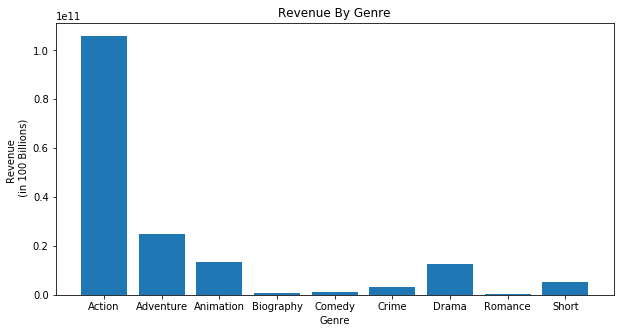

In [44]:
plt.figure(figsize = (10, 5))
plt.bar(genre_revenue_df.index, genre_revenue_df['worldwide-gross'])
plt.title('Revenue By Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue \n (in 100 Billions)');

2. Take all the movies and bin them by the month that they are released. The year of release we do not care about. Then plot them against the revenue generated per movie. So y-axis is revenue and x-axis is the months of the year. And each month of the year contains each movie.

In [45]:
month = []
for data in OMdb['Released']:
    if data != '0':
        month.append(pd.to_datetime(data).month)
    else:
        month.append(0)
        
OMdb['month'] = month

In [46]:
OMdb['month'].value_counts()

7     57
12    53
6     50
11    48
5     43
8     40
10    24
1     23
3     18
9     17
4     16
2     15
0      4
Name: month, dtype: int64

In [47]:
month_revenue_df =pd.DataFrame(OMdb.groupby(by = ['month', 'Title']).sum()['worldwide-gross'])

In [48]:
month_revenue_df.reset_index(inplace = True)

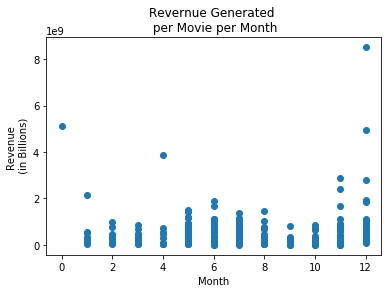

In [49]:
plt.scatter(month_revenue_df['month'], month_revenue_df['worldwide-gross'])
plt.title('Revernue Generated \n per Movie per Month')
plt.xlabel('Month')
plt.ylabel('Revenue \n (in Billions)');

3. For the data points that have budget, revenue (Worldwide-gross) and director (pick director_1) filled in the merged OMDb_mojo_clean.csv..., can we calculate the percentage return on a movie? So it will be (budget/revenue) * 100% equals percentage return on a movie. I want to bin the movies by the director, so that we see which director has the highest percentage return on average. If you think a scatterplot would work better or some other chart, go ahead and do it.

In [50]:
OMdb['pct_return'] = OMdb['budget']/OMdb['worldwide-gross']*100

In [51]:
revenue_director_df = pd.DataFrame(OMdb.groupby(by=['Director']).mean()['pct_return'])

In [52]:
revenue_director_df[revenue_director_df['pct_return']> 100]

,pct_return
Director,
Andrew Dominik,200.000000
Antony Hoffman,238.805970
Carl Rinsch,115.283267
David Koepp,112.540193
Edgar Wright,125.786164
Ericson Core,125.748503
Gavin O'Connor,108.225108
Jonathan Lynn,228.571429
Kathryn Bigelow,152.207002


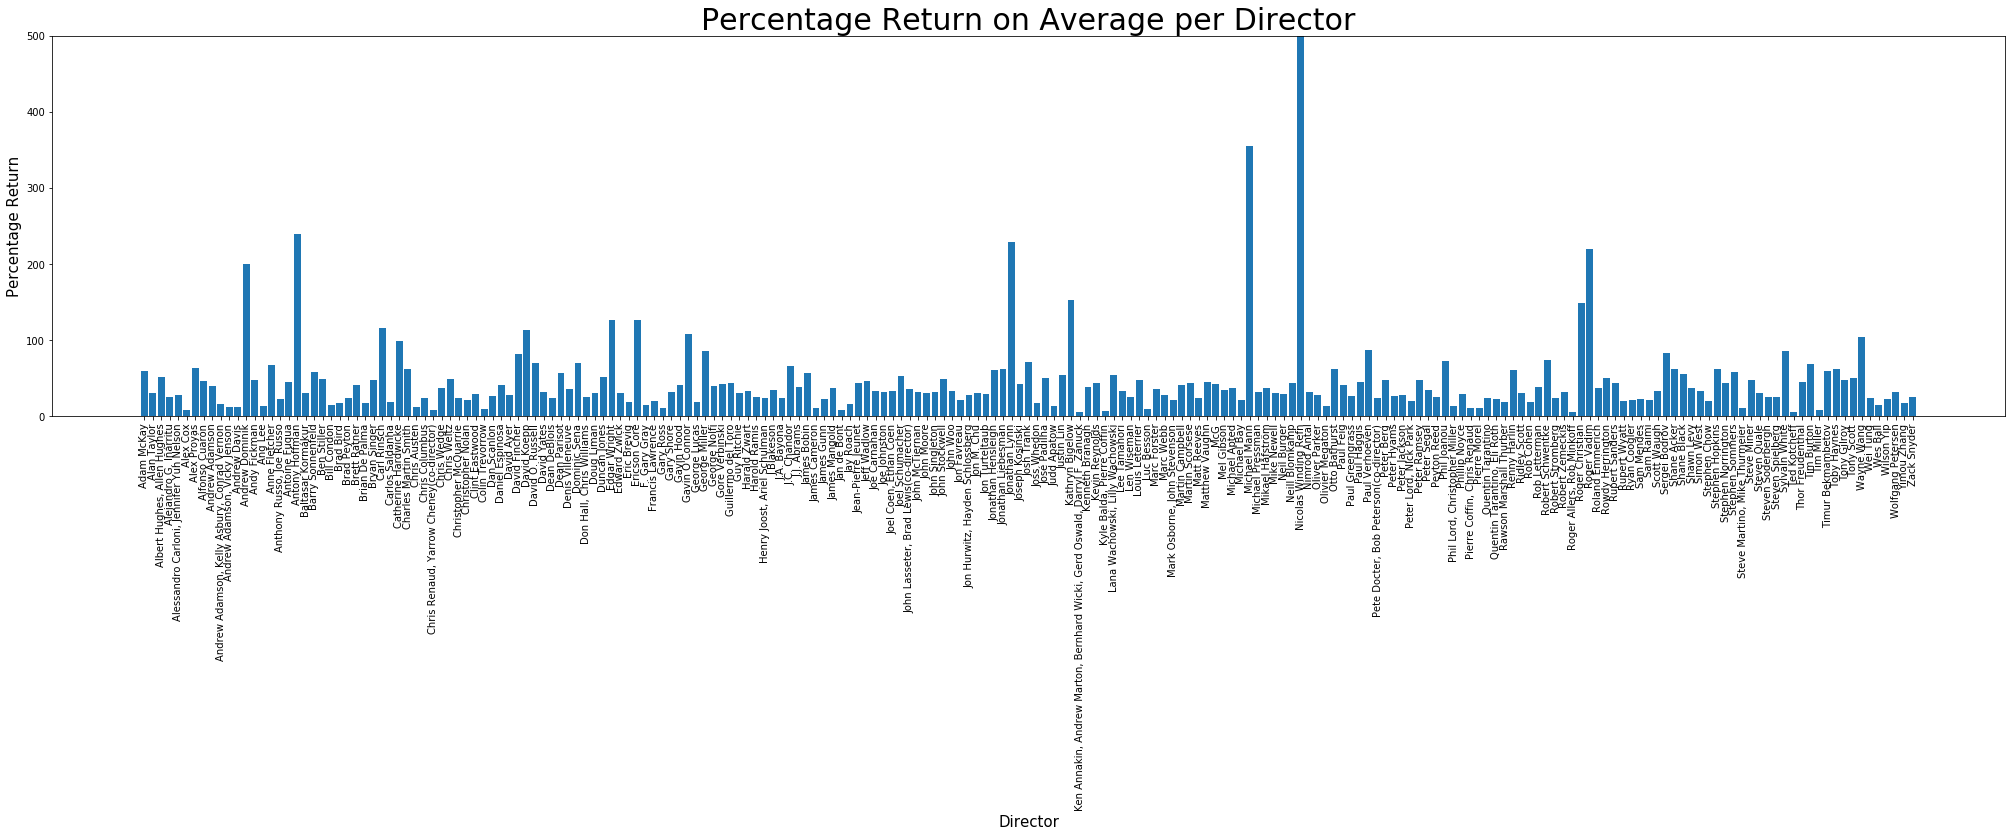

In [53]:
plt.figure(figsize = (35,7))
plt.bar(revenue_director_df.index, revenue_director_df['pct_return'])
plt.title('Percentage Return on Average per Director', fontsize = 30)
plt.ylim(0,500)
plt.xlabel('Director', fontsize = 15)
plt.ylabel('Percentage Return', fontsize = 15)
plt.xticks(rotation = 90);

4. Can we make separate scatterplots (or whatever graphs you deem useful for visualization) for:
a. Worldwide-gross to production studio
b. Worldwide-gross to # of oscar wins
c. Worldwide-gross to # of oscar nomination
d. Worldwide-gross to total # awards won
e. Worldwide-gross to actor_1
f. Worldwide-gross to writer_1

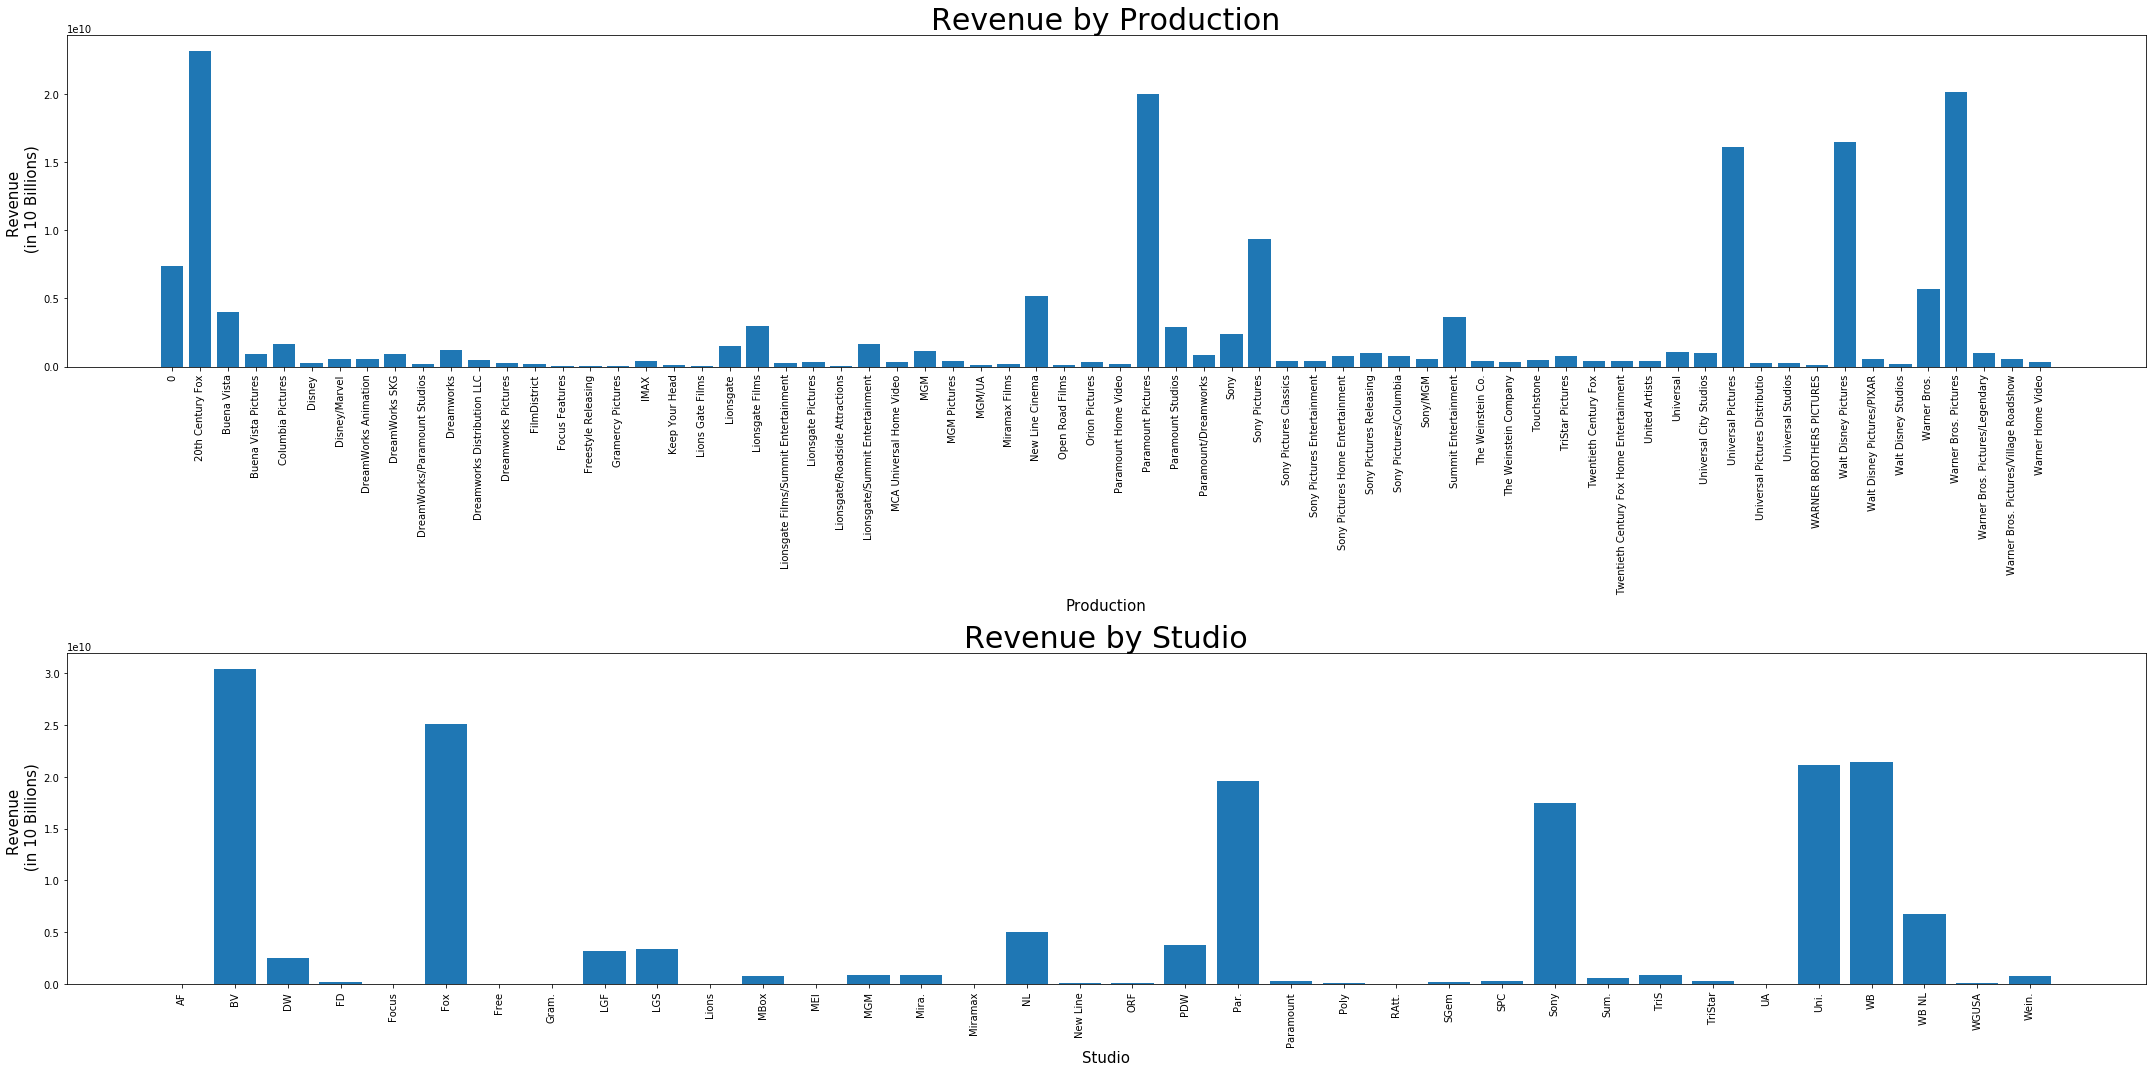

In [54]:
# a. Worldwide-gross to production studio
wwg_production_df = pd.DataFrame(OMdb.groupby(by=['Production']).sum()['worldwide-gross'])
wwg_studio_df = pd.DataFrame(OMdb.groupby(by=['studio']).sum()['worldwide-gross'])

plt.figure(figsize = (30,15))
ax1 = plt.subplot(2,1,1)
ax1.set_title('Revenue by Production', fontsize = 30)
ax1.bar(wwg_production_df.index, wwg_production_df['worldwide-gross'])
ax1.set_xlabel('Production', fontsize = 15)
ax1.set_xticklabels(wwg_production_df.index, rotation = 90)
ax1.set_ylabel('Revenue \n (in 10 Billions)', fontsize = 15)

ax2 = plt.subplot(2,1,2)
ax2.set_title('Revenue by Studio', fontsize = 30)
ax2.bar(wwg_studio_df.index, wwg_studio_df['worldwide-gross'])
ax2.set_xlabel('Studio', fontsize = 15)
ax2.set_xticklabels(wwg_studio_df.index, rotation = 90)
ax2.set_ylabel('Revenue \n (in 10 Billions)', fontsize = 15)

plt.tight_layout()

Text(0, 0.5, 'Revenue \n (in Billions)')

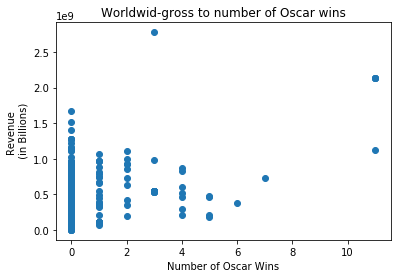

In [55]:
# b. Worldwide-gross to # of oscar wins
plt.scatter(OMdb['oscar_wins'], OMdb['worldwide-gross'])
plt.title('Worldwid-gross to number of Oscar wins')
plt.xlabel('Number of Oscar Wins')
plt.ylabel('Revenue \n (in Billions)')

Text(0, 0.5, 'Revenue \n (in Billions)')

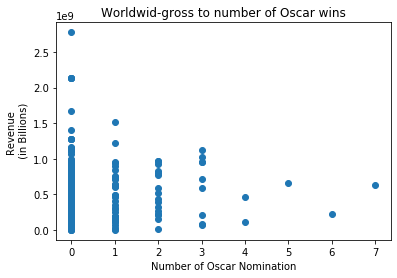

In [56]:
# c. Worldwide-gross to # of oscar nominations
plt.scatter(OMdb['oscar_noms'], OMdb['worldwide-gross'])
plt.title('Worldwid-gross to number of Oscar wins')
plt.xlabel('Number of Oscar Nomination')
plt.ylabel('Revenue \n (in Billions)')

Text(0, 0.5, 'Revenue \n (in Billions)')

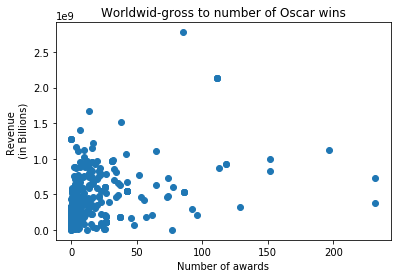

In [57]:
#d. Worldwide-gross to total # awards won
plt.scatter(OMdb['awards'], OMdb['worldwide-gross'])
plt.title('Worldwid-gross to number of Oscar wins')
plt.xlabel('Number of awards')
plt.ylabel('Revenue \n (in Billions)')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Natural Log of the Revenue')

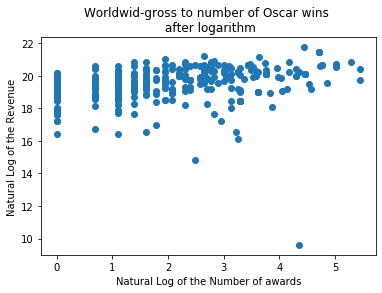

In [58]:
# Use log to reduce the heteroscedasticity
plt.scatter(np.log(OMdb['awards']), np.log(OMdb['worldwide-gross']))
plt.title('Worldwid-gross to number of Oscar wins \n after logarithm')
plt.xlabel('Natural Log of the Number of awards')
plt.ylabel('Natural Log of the Revenue')

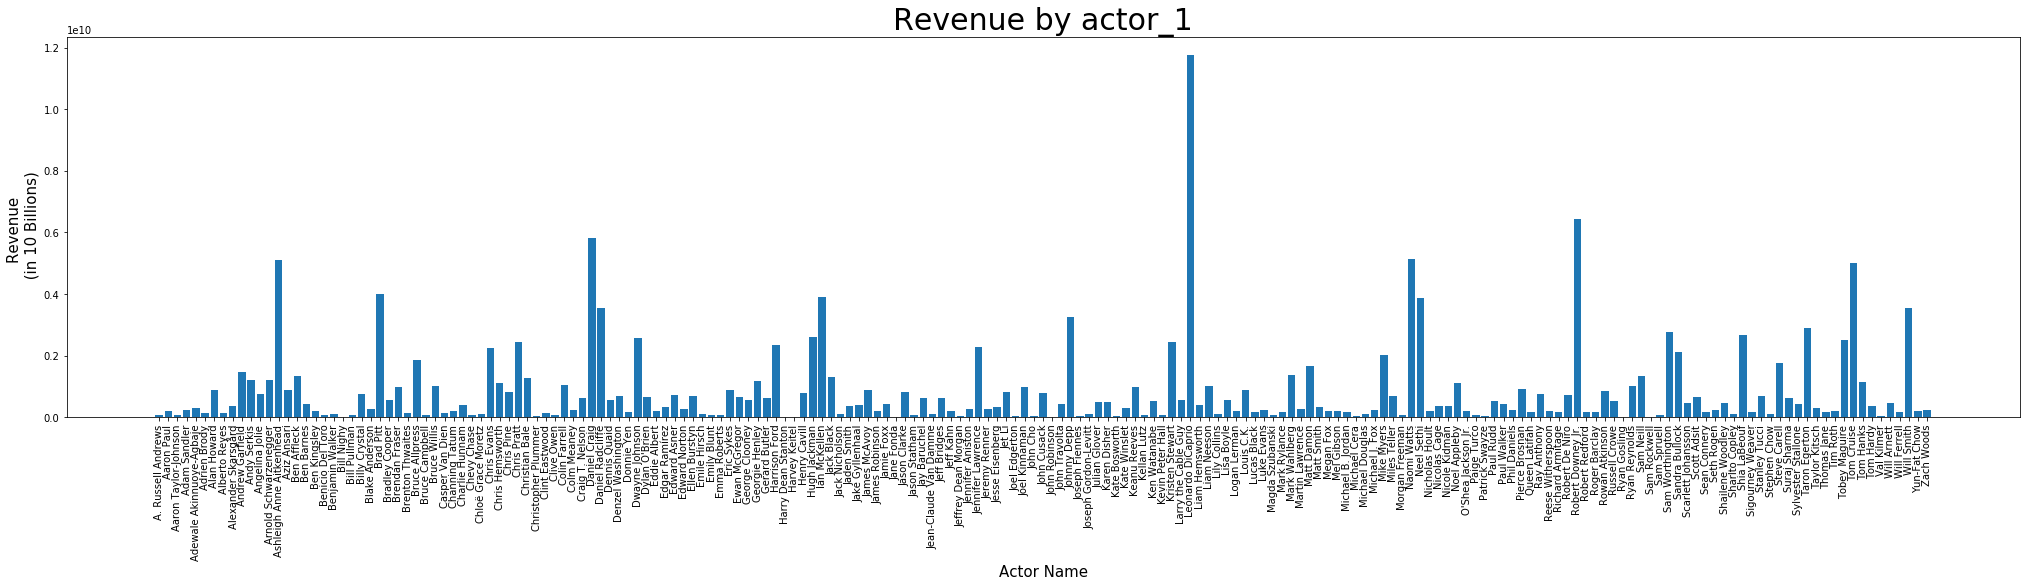

In [59]:
# Worldwide-gross to actor_1
wwg_actor1_df = pd.DataFrame(OMdb.groupby(by=['actor_1']).sum()['worldwide-gross'])
plt.figure(figsize = (35,7))
plt.bar(wwg_actor1_df.index, wwg_actor1_df['worldwide-gross'])
plt.title('Revenue by actor_1', fontsize = 30)
plt.xlabel('Actor Name', fontsize = 15)
plt.ylabel('Revenue \n (in 10 Billions)', fontsize = 15)
plt.xticks(rotation = 90);

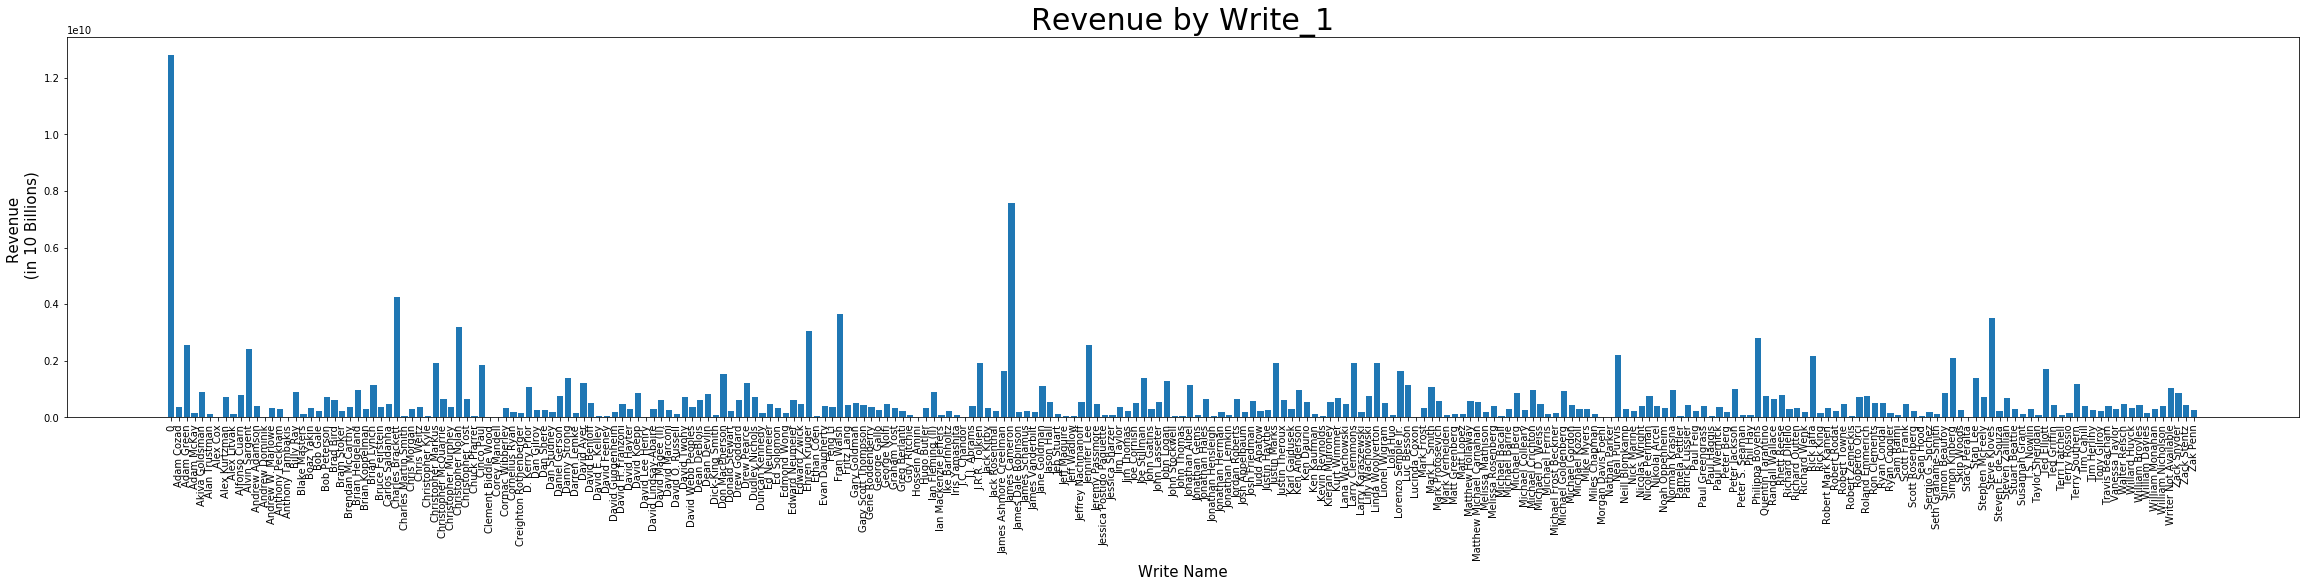

In [60]:
# Worldwide-gross to writer_1
wwg_writer_df = pd.DataFrame(OMdb.groupby(by=['Writer 1']).sum()['worldwide-gross'])
plt.figure(figsize = (40,7))
plt.bar(wwg_writer_df.index, wwg_writer_df['worldwide-gross'])
plt.title('Revenue by Write_1', fontsize = 30)
plt.xlabel('Write Name', fontsize = 15)
plt.ylabel('Revenue \n (in 10 Billions)', fontsize = 15)
plt.xticks(rotation = 90);